In [2]:
import os, sys, re
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.utils.model_handling import get_models_evaluation_data, load_checkpoint, get_model_cfg_from_checkpoint, get_training_cfg_from_checkpoint
from src.utils.visualization import plot_training_metrics

In [2]:
dir = 'models'

In [3]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
models = os.listdir(os.path.join(project_root, 'results', dir))

In [7]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
models = os.listdir(os.path.join(project_root, 'results', 'models'))

print(len(models))
for model_id in models:
    chkpt = load_checkpoint(model_id, 'models')
    cfg = get_model_cfg_from_checkpoint(chkpt)
    tcfg = get_training_cfg_from_checkpoint(chkpt)
    
    key = (cfg.depth, tcfg.learning_rate, cfg.hidden_dropout_prob, tcfg.epochs)
    print(f'model ID: ', model_id, key)

10
model ID:  4ra88 (1, 0.0005, 0.2, 50)
model ID:  41m3g (1, 0.0005, 0.2, 50)
model ID:  0mx31 (1, 0.0005, 0.2, 50)
model ID:  t86e6 (1, 0.0005, 0.2, 50)
model ID:  n766c (1, 0.0005, 0.2, 50)
model ID:  a075n (1, 0.0005, 0.2, 50)
model ID:  8q8f1 (1, 0.0005, 0.2, 50)
model ID:  o936j (1, 0.0005, 0.2, 50)
model ID:  p4o72 (1, 0.0005, 0.2, 50)
model ID:  08lr6 (1, 0.0005, 0.2, 50)


In [8]:
top_6 = ['w41z1', '702zt', '8ic79', 'ja770', 'm2g06', '94y4c']

# Rewards per environment seed (per model)

In [9]:
data = {}
for model_id in top_6:
    data[model_id] = {}

    # get evaluation .pkl
    eval_data = get_models_evaluation_data(model_id=model_id, model_dir=dir)

    for env_info, eval_data in eval_data.items():
        env_seed = int(re.findall(r'\d+', env_info)[0])
        data[model_id][env_seed] = np.round(np.sum(eval_data), 2)

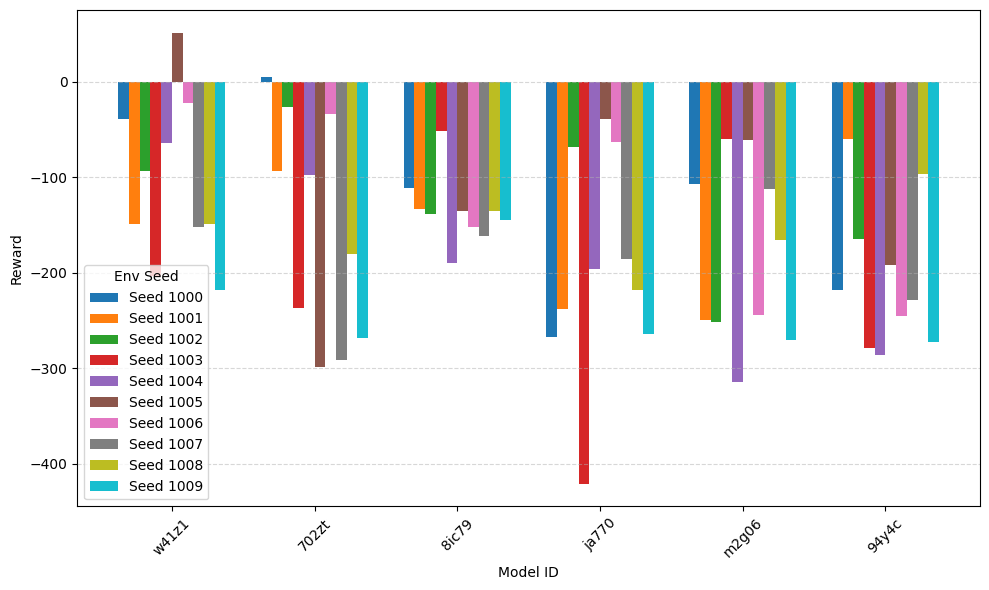

In [10]:
# Extract keys
models = list(data.keys())
env_seeds = sorted(next(iter(data.values())).keys())  # e.g. [1000, 1001, 1002, 1003, 1004]

# Group bar plot setup
x = np.arange(len(models))
bar_width = 0.075
colors = plt.cm.tab10(np.linspace(0, 1, len(env_seeds)))

plt.figure(figsize=(10, 6))

# Plot one bar per env seed
for i, seed in enumerate(env_seeds):
    rewards = [data[m][seed] for m in models]
    plt.bar(x + i * bar_width, rewards, width=bar_width, label=f"Seed {seed}", color=colors[i])

# Formatting
plt.xticks(x + bar_width * (len(env_seeds) - 1) / 2, models, rotation=45)
plt.xlabel("Model ID")
plt.ylabel("Reward")
#plt.title("Model Evaluation Rewards per Environment Seed" + f' ({dir.split('_')[1]} {dir.split('_')[2]})')
plt.legend(title="Env Seed")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()
#plt.savefig(os.path.join(plot_save_dir, "model_evaluation_rewards_per_environment_seed" + f'_{dir.split('_')[1]}_{dir.split('_')[2]}.svg'))

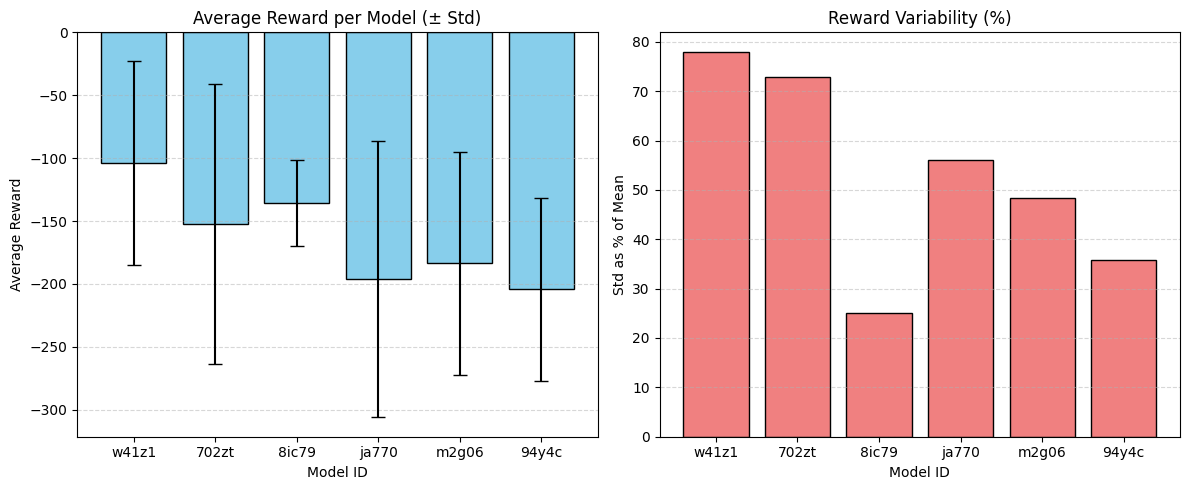

In [17]:
models = list(data.keys())
env_seeds = sorted(next(iter(data.values())).keys())

# Compute statistics
avg_rewards = []
std_rewards = []
std_percentage = []

for model in models:
    rewards = [data[model][seed] for seed in env_seeds]
    mean_val = np.mean(rewards)
    std_val = np.std(rewards)
    avg_rewards.append(mean_val)
    std_rewards.append(std_val)
    std_percentage.append(abs((std_val / mean_val) * 100 if mean_val != 0 else 0))

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- First subplot: average reward with std ---
axes[0].bar(models, avg_rewards, yerr=std_rewards, capsize=5, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Model ID")
axes[0].set_ylabel("Average Reward")
axes[0].set_title("Average Reward per Model (± Std)")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Second subplot: std as % of mean ---
axes[1].bar(models, std_percentage, color='lightcoral', edgecolor='black')
axes[1].set_xlabel("Model ID")
axes[1].set_ylabel("Std as % of Mean")
axes[1].set_title("Reward Variability (%)")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [14]:
setup = {}

for model_id in models:
    chkpt = load_checkpoint(model_id)
    cfg = get_model_cfg_from_checkpoint(chkpt)
    tcfg = get_training_cfg_from_checkpoint(chkpt)
    
    key = (cfg.depth,  cfg.num_attention_heads, cfg.embedding_dim, cfg.intermediate_dim)

    if key not in setup:
        setup[key] = []

    setup[key].append(model_id)

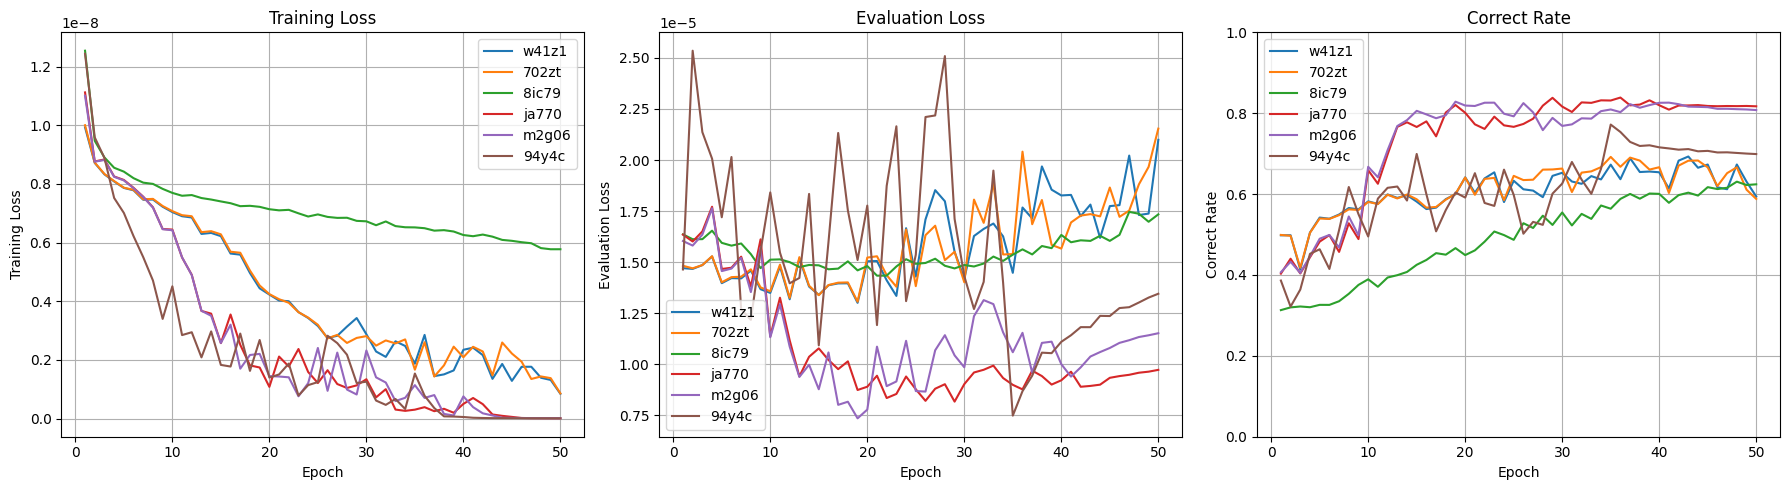

In [15]:
plot_training_metrics(model_id=list(models))

In [21]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))
models = os.listdir(os.path.join(project_root, 'results', dir))

architecture_A = []

for model_id in models:
    chkpt = load_checkpoint(model_id)
    cfg = get_model_cfg_from_checkpoint(chkpt)
    tcfg = get_training_cfg_from_checkpoint(chkpt)
    
    key = (cfg.depth,  cfg.num_attention_heads, cfg.embedding_dim, cfg.intermediate_dim)

    if cfg.depth == 2:
        architecture_A.append(model_id)
        print(f'model ID: ', model_id)
        print(f'learning rate: ', tcfg.learning_rate)
        print(f'dropout: ', cfg.hidden_dropout_prob, '\n')

model ID:  w41z1
learning rate:  0.0005
dropout:  0.2 

model ID:  702zt
learning rate:  0.0005
dropout:  0.4 

model ID:  7yo77
learning rate:  0.005
dropout:  0.2 

model ID:  0j9j9
learning rate:  5e-05
dropout:  0.1 

model ID:  2n6j7
learning rate:  5e-05
dropout:  0.2 

model ID:  c9m04
learning rate:  5e-05
dropout:  0.2 



In [ ]:
plot_training_metrics(model_id=architecture_A)